## Observations 
available:
| Dataset    | variables   | ESMValTool-find |
|:------------|:-------------|:--------------------|
|ERA-Interim | sst(tos, Omon)(ts, Amon), pr, taux(tauu) |OBS6, reanaly, tier3 |
|NOAA-CIRES-20CR-V2     |prw,  |OBS6, Tier2 |
|HadISST     |tos/ts,   |OBS, Tier2 |
|NOAA-ERSSTv5|tos      |OBS6, Tier2 |
|NCEP-NCAR-R1|ts, pr   |OBS6, Tier2 |
|NCEP        |pr     |OBS, Tier2 |
|GPCP-SG     |pr,    |OBS, Tier2 |

Need to get:
- TropFlux - sst, taux (https://incois.gov.in/tropflux/DataHome.jsp)
- CMAP - pr (https://psl.noaa.gov/data/gridded/data.cmap.html)

In [1]:
from esmvalcore.config import CFG
from esmvalcore.dataset import Dataset

CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

obs = Dataset(dataset= 'ERA-Interim', project= 'OBS6', 
              type= 'reanaly', version='1', 
              timerange='1979/2018', tier='3', 
              mip='Omon', short_name='ts')

print(len(obs.files))
list(obs.from_files())
# obs.find_files(), obs.files

0


[Dataset:
 {'dataset': 'ERA-Interim',
  'project': 'OBS6',
  'mip': 'Omon',
  'short_name': 'ts',
  'frequency': 'mon',
  'long_name': 'Surface Temperature',
  'modeling_realm': ['atmos'],
  'original_short_name': 'ts',
  'standard_name': 'surface_temperature',
  'tier': '3',
  'timerange': '1979/2018',
  'type': 'reanaly',
  'units': 'K',
  'version': '1'}
 session: 'session-ef9ba2fe-c08f-481a-a0ac-67187eddfb4a_20241001_043535']

In [4]:
from esmvalcore.config import CFG
CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')
from esmvalcore.dataset import Dataset
obs_sst = Dataset(dataset= 'NOAA-ERSSTv5', 
                 project= 'OBS6', 
                 type= '*', 
                 version='*' , 
                 timerange = '1970/2018', 
                 tier='*', 
                 mip='*', 
                 short_name='tos')

obs_sst.find_files()
obs_sst.files

# list(obs_sst.from_files())

[LocalFile('/g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier2/NOAA-ERSSTv5/OBS6_NOAA-ERSSTv5_reanaly_v5_Omon_tos_185401-200712.nc'),
 LocalFile('/g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier2/NOAA-ERSSTv5/OBS6_NOAA-ERSSTv5_reanaly_v5_Omon_tos_200801-202001.nc')]

In [2]:
from esmvalcore.config import CFG
from esmvalcore.dataset import Dataset
import iris
CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

In [2]:

# CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241007_233937"]
# CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241016_034743"]
CFG['rootpath']['OBS6']

['/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241016_034743']

In [18]:
# obs = Dataset(dataset= 'ensda-v351', project= 'CREATE-IP', 
#               type= 'reanalysis', version='*', 
#               timerange='*', institute='NOAA-ESRLandCIRES', 
#               mip='Amon', short_name='tas')

model = Dataset(
    short_name='pr', project='CMIP6', institute='*',
    mip="Amon", exp="historical", ensemble="r1i1p1f1",
    timerange="19790101/20190101",
    dataset="*",  grid="gn"
)
print(len(model.files),len(list(model.from_files())))
obs = Dataset(dataset='*',project= 'OBS6', mip= 'Amon', tier='*', #'NOAA-CIRES-20CR-V2'
         type= 'reanaly', version= '*', start_year= '1910', end_year= '2012', short_name='pr') #pr, tauu, tauv
print(len(obs.files))
list(obs.from_files())

# obs.find_files(), obs.files
# for obs_ds in list(obs.from_files()):
#     obs_ds['tier'] = obs_ds['tier'][-1]
    # print(obs_ds['tier'][-1],obs_ds.load())


3 3
169


[Dataset:
 {'dataset': 'CMAP',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'pr',
  'end_year': '2012',
  'frequency': 'mon',
  'long_name': 'Precipitation',
  'modeling_realm': ['atmos'],
  'original_short_name': 'pr',
  'standard_name': 'precipitation_flux',
  'start_year': '1910',
  'tier': 'Tier2',
  'type': 'reanaly',
  'units': 'kg m-2 s-1',
  'version': '*'}
 session: 'session-f9ca05f1-ab88-4c03-ad6e-05abd8045926_20241016_235124',
 Dataset:
 {'dataset': 'CRU',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'pr',
  'end_year': '2012',
  'frequency': 'mon',
  'long_name': 'Precipitation',
  'modeling_realm': ['atmos'],
  'original_short_name': 'pr',
  'standard_name': 'precipitation_flux',
  'start_year': '1910',
  'tier': 'Tier2',
  'type': 'reanaly',
  'units': 'kg m-2 s-1',
  'version': '*'}
 session: 'session-f9ca05f1-ab88-4c03-ad6e-05abd8045926_20241016_235124',
 Dataset:
 {'dataset': 'NCEP-NCAR-R1',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'pr',


In [21]:
%%time
import iris
import cartopy.crs as ccrs
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from esmvalcore.preprocessor import (
                regrid,
                extract_region, convert_units,
                climate_statistics, annual_statistics, area_statistics ) # month mean, standard deviation
iris.FUTURE.datum_support = True
def preproc_base(cube):
    # cube = convert_units(cube, units="mm/day")
    # cube = extract_region(cube, 150, 270, -25, 25)
    cube = area_statistics(cube, 'mean')
    cube = annual_statistics(cube, 'mean')
    # cube = cube.collapsed('month_number', iris.analysis.STD_DEV)

    # cube.convert_units('1e-3 N/m2')
    return cube
    
# print(obs.files)
preproc_1 = {}
for obs_ds in list(obs.from_files()):
    obs_ds['tier'] = obs_ds['tier'][-1]
    obs_ds['timerange'] = '1910/2010'
    cube = preproc_base(obs_ds.load())
    iris.util.promote_aux_coord_to_dim_coord(cube, 'year')
    preproc_1[obs_ds['dataset']] = cube
    print(cube.shape)

# for ds in list(model.from_files()):
#     cube = preproc_base(ds.load())
#     iris.util.promote_aux_coord_to_dim_coord(cube, 'year')
#     preproc_1[ds['dataset']] = cube
#     print('model',cube.shape)
    
# dataout = preproc_base(obs.load())
# dataout

(32,)


/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.4/lib/python3.11/site-packages/iris/coords.py:2140: IrisVagueMetadataWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'Number of stations'.
  warnings.warn(


(101,)
(63,)
(101,)


(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191001-191012.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191001-191012.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191001-191012.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191101-191112.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191101-191112.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191101-191112.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191201-191212.nc)
(for file /g/data/kj13/datasets/esmvaltool/obsdata-v2/Tier3/ANUClimate/OBS6_ANUClimate_reanaly_v2-0_Amon_pr_191201-191

(101,)
(32,)
(32,)
(32,)
CPU times: user 11.3 s, sys: 5.28 s, total: 16.6 s
Wall time: 11.8 s


lwe_precipitation_rate / (mm/day)   (latitude: 72; longitude: 144)
    Dimension coordinates:
        latitude                             x              -
        longitude                            -              x
    Scalar coordinates:
        time                        2001-10-16 12:00:00, bound=(1978-12-16 12:00:00, 2024-08-16 12:00:00)
    Cell methods:
        0                           time: mean
    Attributes:
        Conventions                 'CF-1.7'
        host                        'gadi-login-08.gadi.nci.org.au'
        mip                         'Amon'
        modeling_realm              'reanaly'
        project_id                  'OBS6'
        reference                   'doi not found'
        source                      'https://psl.noaa.gov/data/gridded/data.cmap.html'
        tier                        '2'
        title                       'CMAP data reformatted for ESMValTool v2.12.0.dev26+g7ea975a4d'
        user                        'mp7041'
  

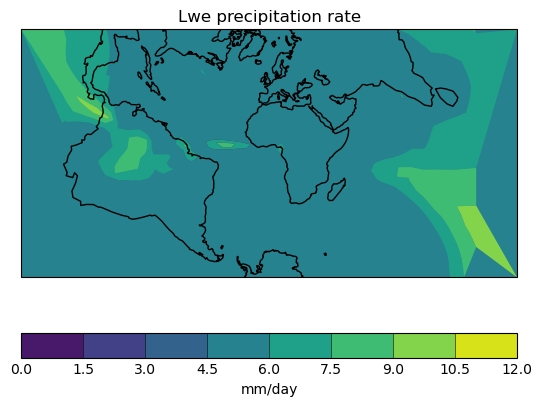

In [31]:
from esmvalcore.preprocessor import climate_statistics
import cartopy.crs as ccrs
for obs_ds in list(obs.from_files()):
    if obs_ds['dataset'] == 'CMAP':
        obs_ds['tier'] = obs_ds['tier'][-1]
        cube = climate_statistics(obs_ds.load(),operator='mean',period='full')
        cube = convert_units(cube, units="mm/day")

print(cube.summary())
proj = ccrs.TransverseMercator()
ax = plt.subplot(projection=proj)

qplt.contourf(cube)
ax.coastlines()

CPU times: user 31.3 ms, sys: 1.76 ms, total: 33.1 ms
Wall time: 30.8 ms


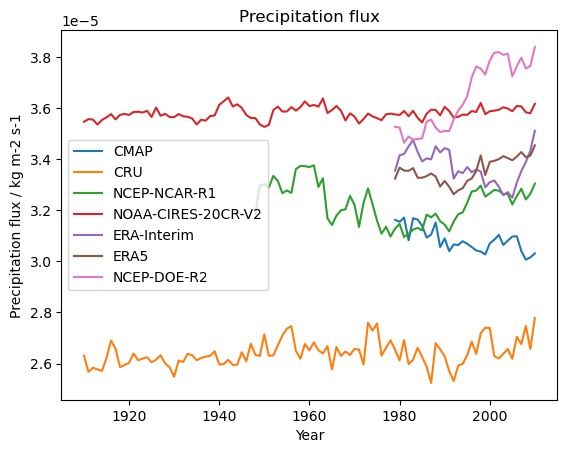

In [23]:
%%time
# qplt.contourf(preproc_1['CRU'])
for lb, cube in preproc_1.items():
    if lb != 'ANUClimate':
        qplt.plot(cube, label=lb)

plt.legend()


In [1]:
import os
rawpath = '/scratch/iq82/fc6164/esmvaltool_output/climate_data/Tier2/NOAA-CIRES-20CR-V2/surface_gauss'
filels =[]
for filename in os.listdir(rawpath):
    filels.append(os.path.join(rawpath, filename))
# cbls = iris.load(filels)


In [9]:

# CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241007_233937"]
# CFG['rootpath']['OBS6'] = [r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241015_044626"]
CFG['rootpath']['OBS6'].append(r"/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241016_034743")
CFG['rootpath']['OBS6']

[PosixPath('/g/data/kj13/datasets/esmvaltool/obsdata-v2'),
 '/scratch/iq82/fc6164/esmvaltool_output/data_formatting_20241016_034743']

In [10]:
obs = Dataset(dataset='*',project= 'OBS6', mip= 'Amon', tier='*', #''
         type= 'reanaly', version= '*', start_year= '1910', end_year= '2012', short_name='tauu')
# print(obs.files)
# cube = obs.load()
# cube.attributes, cube.long_name
# iris.load(obs.files[0])
list(obs.from_files())

[Dataset:
 {'dataset': 'NOAA-CIRES-20CR-V2',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'tauu',
  'end_year': '2012',
  'start_year': '1910',
  'tier': 'Tier2',
  'type': 'reanaly',
  'version': '*'},
 Dataset:
 {'dataset': 'ERA-Interim',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'tauu',
  'end_year': '2012',
  'start_year': '1910',
  'tier': 'Tier3',
  'type': 'reanaly',
  'version': '*'},
 Dataset:
 {'dataset': 'NCEP-DOE-R2',
  'project': 'OBS6',
  'mip': 'Amon',
  'short_name': 'tauu',
  'end_year': '2012',
  'start_year': '1910',
  'tier': 'Tier2',
  'type': 'reanaly',
  'version': '*'}]